### Import Library yang akan digunakan

In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import DecisionBoundaryDisplay
import numpy as np
from sklearn.metrics import classification_report

### menggunakan funcion dari pandas read_csv untuk membaca dataset

In [2]:
df = pd.read_csv("Star3642_balanced.csv")

### Penjelasan tiap Kolom
#### Vmag disini adalah data untuk besarnya bintang
#### Plx jarak bintang dengan bumi
#### e_Plx perkiraan selisih dari jarak asli bintang dengan bumi
#### B-V adalah indeks warna bintang semakin rendah maka semakin panas bintangnya
#### SpType adalah kolom kategorikal bintang

In [3]:
df.head()

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,5.99,13.73,0.58,1.318,K5III,16.678352,0
1,8.70,2.31,1.29,-0.045,B1II,15.518060,0
2,5.77,5.50,1.03,0.855,G5III,14.471813,0
3,6.72,5.26,0.74,-0.015,B7V,15.324928,1
4,8.76,13.44,1.16,0.584,G0V,19.401997,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Vmag         3642 non-null   float64
 1   Plx          3642 non-null   float64
 2   e_Plx        3642 non-null   float64
 3   B-V          3642 non-null   float64
 4   SpType       3642 non-null   object 
 5   Amag         3642 non-null   float64
 6   TargetClass  3642 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 199.3+ KB


### menghapus kolom SpType karena dirasa tidak perlu

In [5]:
df = df.drop('SpType', axis=1)

### disini saya membandingkan plot tiap label untuk mencari label yang dirasa bagus untuk di training

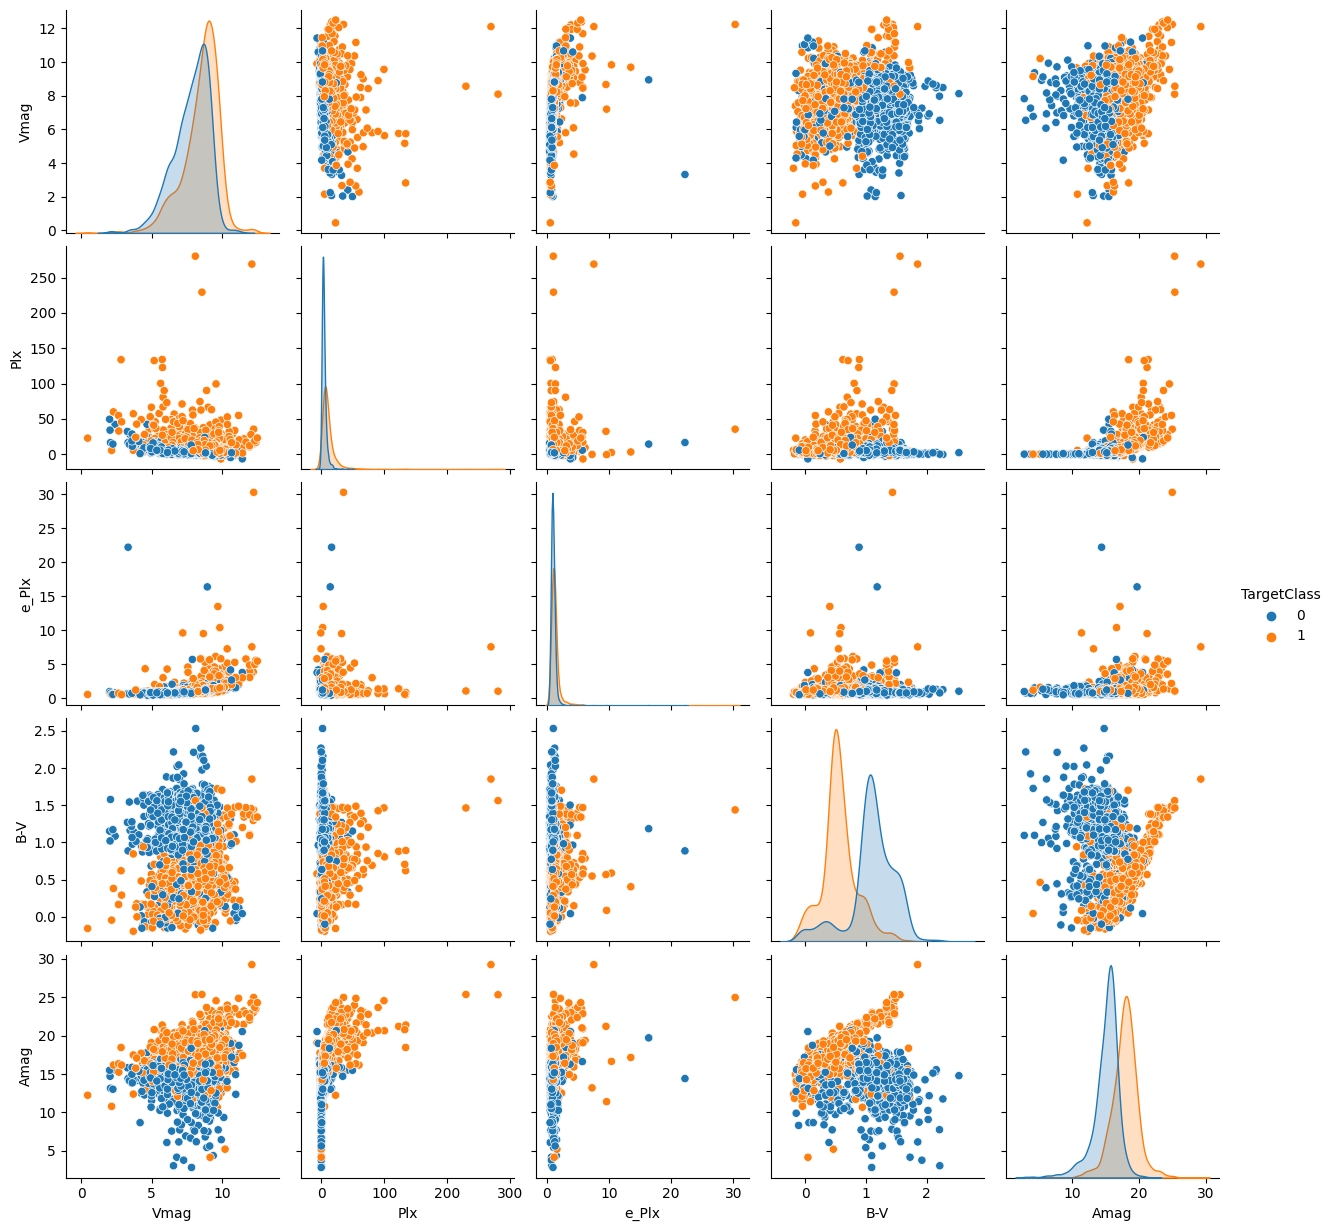

In [6]:
sns.pairplot(df,hue='TargetClass')
plt.show()

# Supervised Learning

### disini saya melakukan standarisasi untuk meminimalkan angka

In [7]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()

In [8]:
df[['Vmag','Plx','e_Plx','B-V','Amag']] = SS.fit_transform(df[['Vmag','Plx','e_Plx','B-V','Amag']])

### untuk target label X saya menggunakan kolom Amag, dan Vmag dan y nya TargetClass

In [9]:
X = df[['Amag','Vmag']]
y = df['TargetClass']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### disini saya melakukan random forest classifier untuk melatih model

In [11]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

RandomForestClassifier()

In [12]:
y_prediksi1 = rfc.predict(X_test)
report = classification_report(y_test ,y_prediksi1,labels=[1,0])
print(report)

              precision    recall  f1-score   support

           1       0.80      0.78      0.79       376
           0       0.77      0.79      0.78       353

    accuracy                           0.79       729
   macro avg       0.79      0.79      0.79       729
weighted avg       0.79      0.79      0.79       729



### setelah melatih model dengan random forest classifier saya melatihnya lagi dengan SVM kernel Linear

In [13]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [14]:
y_prediksi2 = svm.predict(X_test)

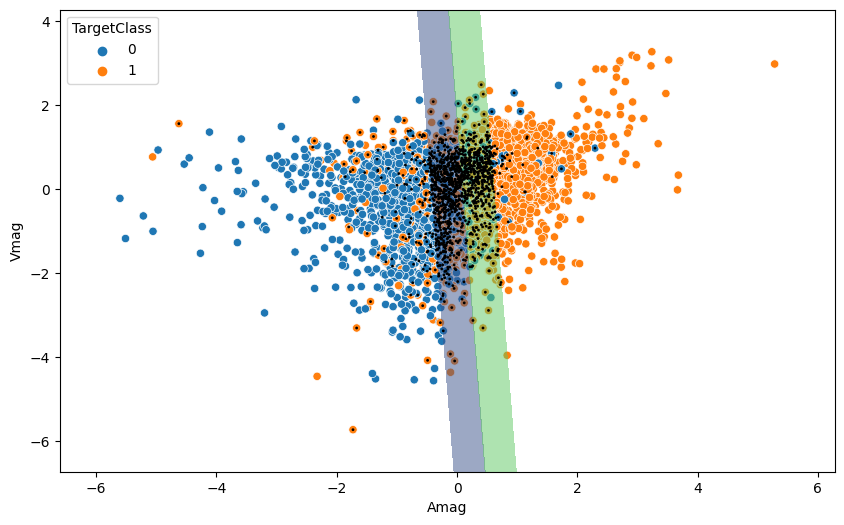

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Amag', y='Vmag', hue='TargetClass', data=df)

ax = plt.gca()

DecisionBoundaryDisplay.from_estimator(
    estimator=svm,
    X=X,
    plot_method="contourf",
    # colors="k", # untuk warna abu
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)

ax.scatter(
    svm.support_vectors_[:, 0],
    svm.support_vectors_[:, 1],
    s=1,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)

plt.xlabel('Amag')
plt.ylabel('Vmag')
plt.show()

### Hasil Prediksi

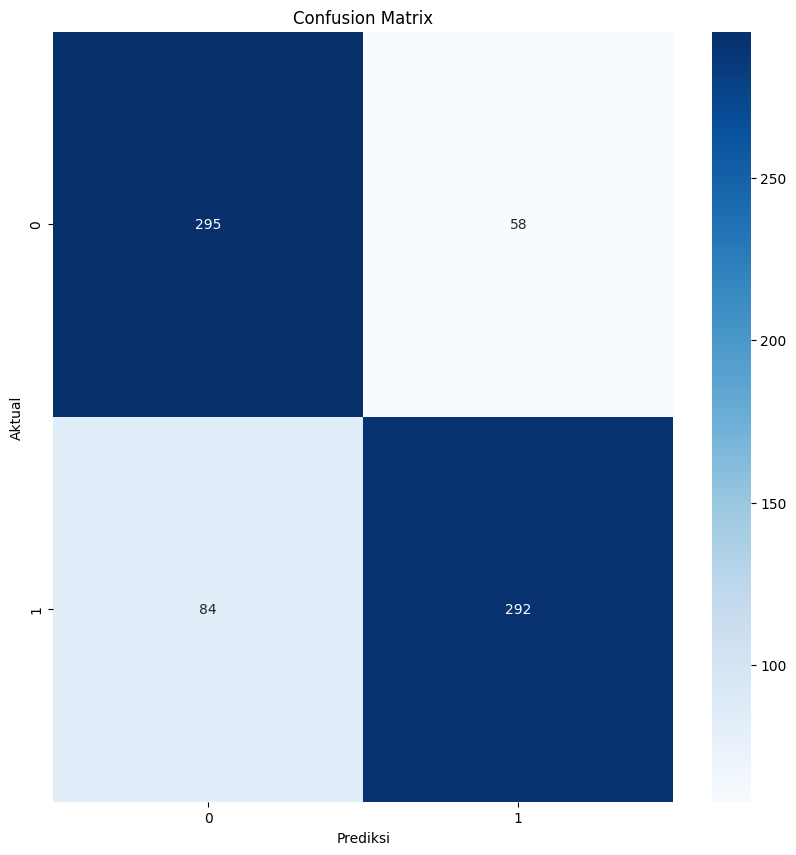

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_prediksi2)

# Visualisasi Confusion Matrix dengan Heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

In [17]:
report = classification_report(y_test ,y_prediksi2,labels=[1,0])
print(report)

              precision    recall  f1-score   support

           1       0.83      0.78      0.80       376
           0       0.78      0.84      0.81       353

    accuracy                           0.81       729
   macro avg       0.81      0.81      0.81       729
weighted avg       0.81      0.81      0.81       729



### disini saya iseng mencoba untuk mengganti kernel SVM menjadi poly

In [18]:
svm = SVC(kernel='poly')
svm.fit(X_train, y_train)

SVC(kernel='poly')

In [19]:
y_prediksi3 = svm.predict(X_test)

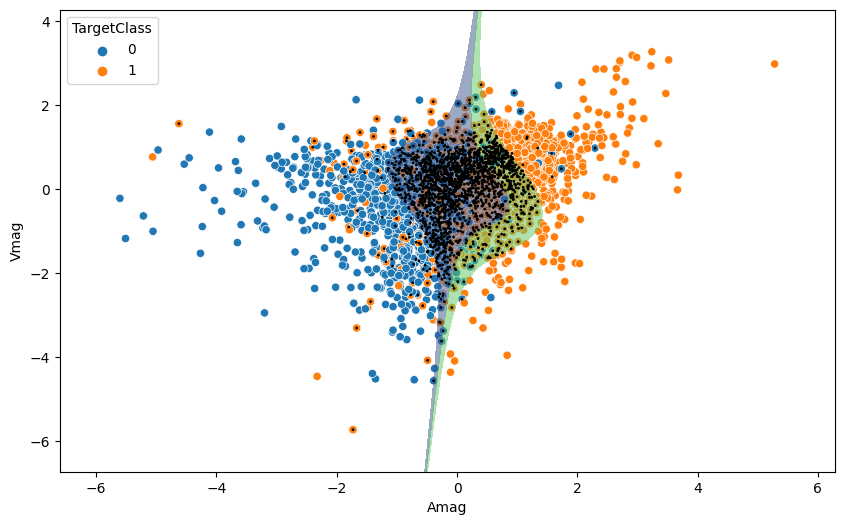

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Amag', y='Vmag', hue='TargetClass', data=df)

ax = plt.gca()

DecisionBoundaryDisplay.from_estimator(
    estimator=svm,
    X=X,
    plot_method="contourf",
    # colors="k", # untuk warna abu
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)

ax.scatter(
    svm.support_vectors_[:, 0],
    svm.support_vectors_[:, 1],
    s=1,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)

plt.xlabel('Amag')
plt.ylabel('Vmag')
plt.show()

### Hasil Prediksi

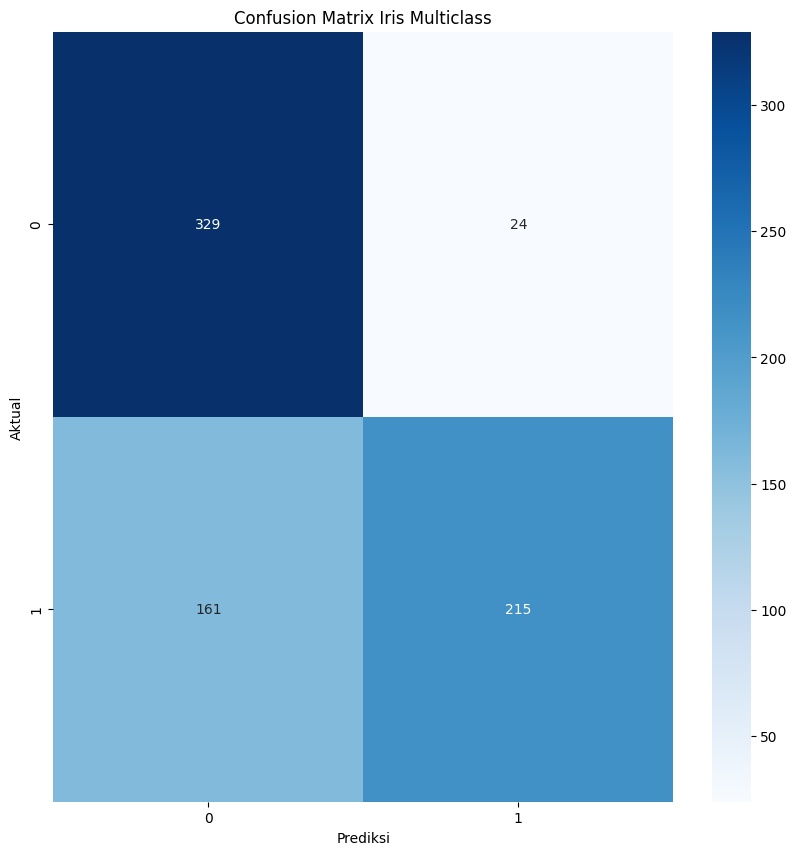

In [21]:
cm = confusion_matrix(y_test, y_prediksi3)

# Visualisasi Confusion Matrix dengan Heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Iris Multiclass')
plt.show()

In [22]:
report = classification_report(y_test ,y_prediksi3,labels=[1,0])
print(report)

              precision    recall  f1-score   support

           1       0.90      0.57      0.70       376
           0       0.67      0.93      0.78       353

    accuracy                           0.75       729
   macro avg       0.79      0.75      0.74       729
weighted avg       0.79      0.75      0.74       729



setelah melakukan training model diatas dan membandingkan kernel poly dan linear menurut saya lebih efektif menggunakan kernel linear karena memiliki akurasi diatas poly

# Unsupervised Learning

In [23]:
X = df[['Amag','Vmag']]
y = df['TargetClass']

### implementasi K-Means untuk mencari nilai K

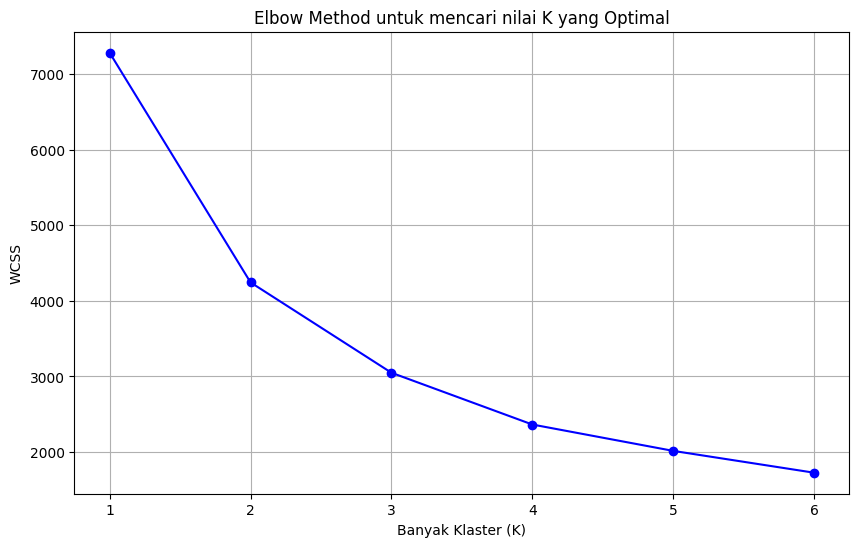

In [24]:
from sklearn.cluster import KMeans

wcss= []

for k in range(1,7):
    model = KMeans(n_clusters=k, n_init=10, random_state=0)
    model.fit(X)
    wcss.append(model.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 7), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method untuk mencari nilai K yang Optimal')
plt.xlabel('Banyak Klaster (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [25]:
kmeans = KMeans(n_clusters = 2, n_init = 'auto')
kmeans.fit(X)

KMeans(n_clusters=2, n_init='auto')

In [26]:
df['cluster'] = kmeans.labels_
centroid = kmeans.cluster_centers_

centroid

array([[-0.72930181, -0.75963056],
       [ 0.54890666,  0.57173349]])

### Mengevaluasi K-Means

In [27]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

ss_score = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score: {ss_score:.2f}")

db_index = davies_bouldin_score(X, kmeans.labels_)
print(f"Davies-Bouldin Index: {db_index:.2f}")

ch_index = calinski_harabasz_score(X, kmeans.labels_)
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.39
Davies-Bouldin Index: 0.99
Calinski-Harabasz Index: 2607.06


In [28]:
from sklearn.metrics import adjusted_rand_score # ARI
from sklearn.metrics import normalized_mutual_info_score # NMI
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score # HCV-M

cross_tab = pd.crosstab(df["cluster"], df["TargetClass"])
print("Cross-Tabulation:")
print(cross_tab, "\n")

ari = adjusted_rand_score(df["TargetClass"], kmeans.labels_)
print(f"Adjusted Rand Index (ARI)           : {ari:.2f}")

true_labels_num = df["TargetClass"].astype("category").cat.codes
nmi = normalized_mutual_info_score(true_labels_num, kmeans.labels_)
print(f"Normalized Mutual Information (NMI) : {nmi:.2f}")

homogeneity = homogeneity_score(df["TargetClass"], kmeans.labels_)
completeness = completeness_score(df["TargetClass"], kmeans.labels_)
v_measure = v_measure_score(df["TargetClass"], kmeans.labels_)
print(f"Homogeneity Score                   : {homogeneity:.2f}")
print(f"Completeness Score                  : {completeness:.2f}")
print(f"V-Measure Score                     : {v_measure:.2f}")

Cross-Tabulation:
TargetClass     0     1
cluster                
0            1199   360
1             622  1461 

Adjusted Rand Index (ARI)           : 0.21
Normalized Mutual Information (NMI) : 0.16
Homogeneity Score                   : 0.16
Completeness Score                  : 0.17
V-Measure Score                     : 0.16


### Plot Clustering

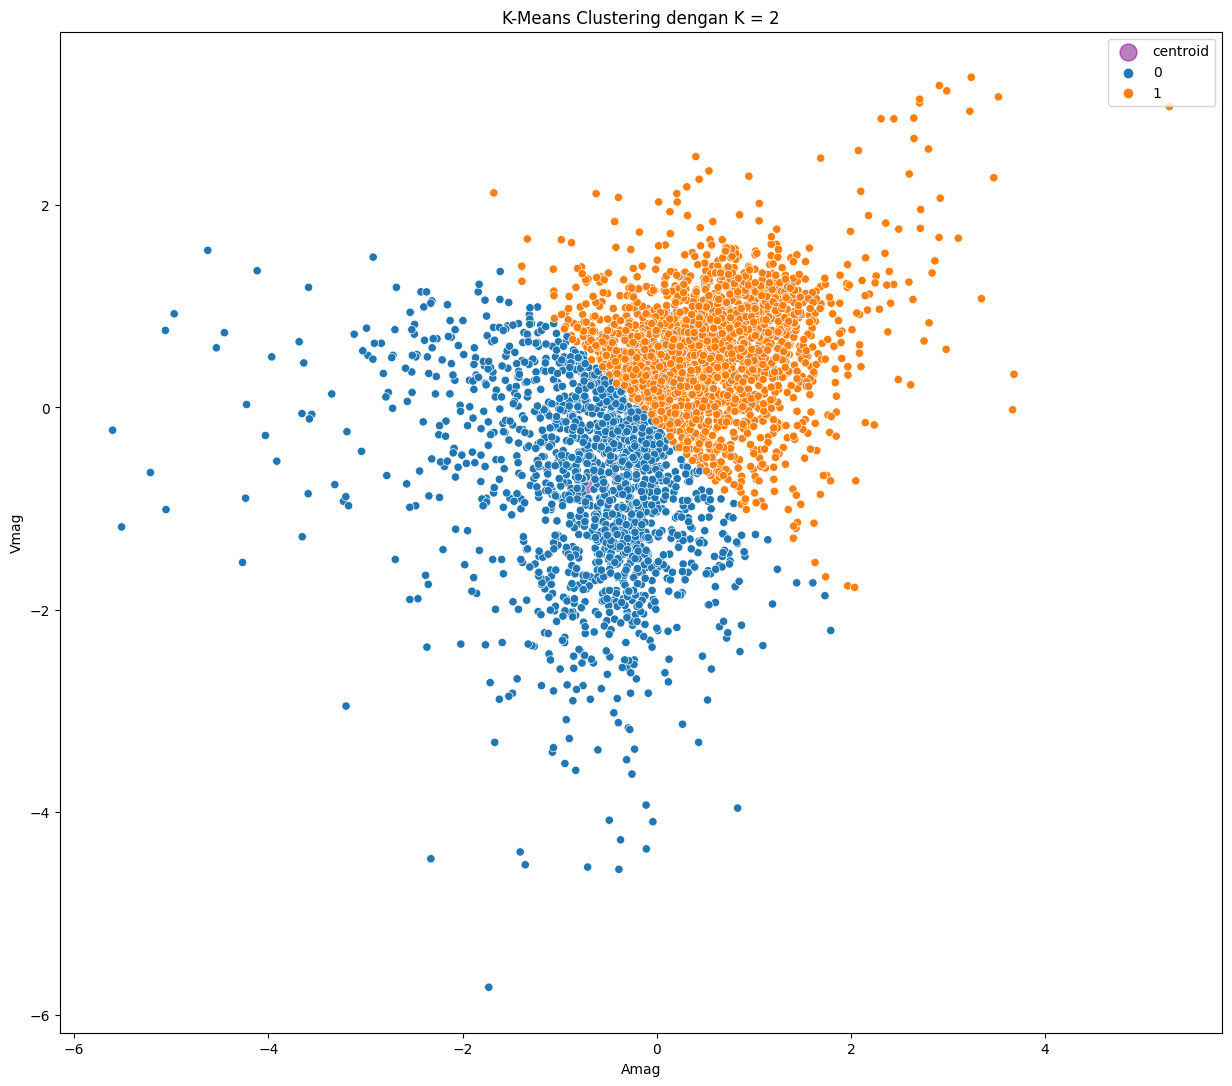

In [29]:
plt.figure(figsize = (15, 13 ))

# Data Points Pusat (Centroid)
plt.scatter(centroid[:, 0], centroid[:, 1], 
            alpha = 0.5, c = 'purple', s = 150, label = 'centroid')

# Data Points Hasil Prediksi Cluster
sns.scatterplot(data = df, x = 'Amag', y = 'Vmag',
                hue = 'cluster')
plt.title("K-Means Clustering dengan K = 2")
plt.xlabel = ("Amag")
plt.ylabel = ("Vmag")
plt.legend(loc = 'upper right')

plt.show()

TypeError: 'str' object is not callable

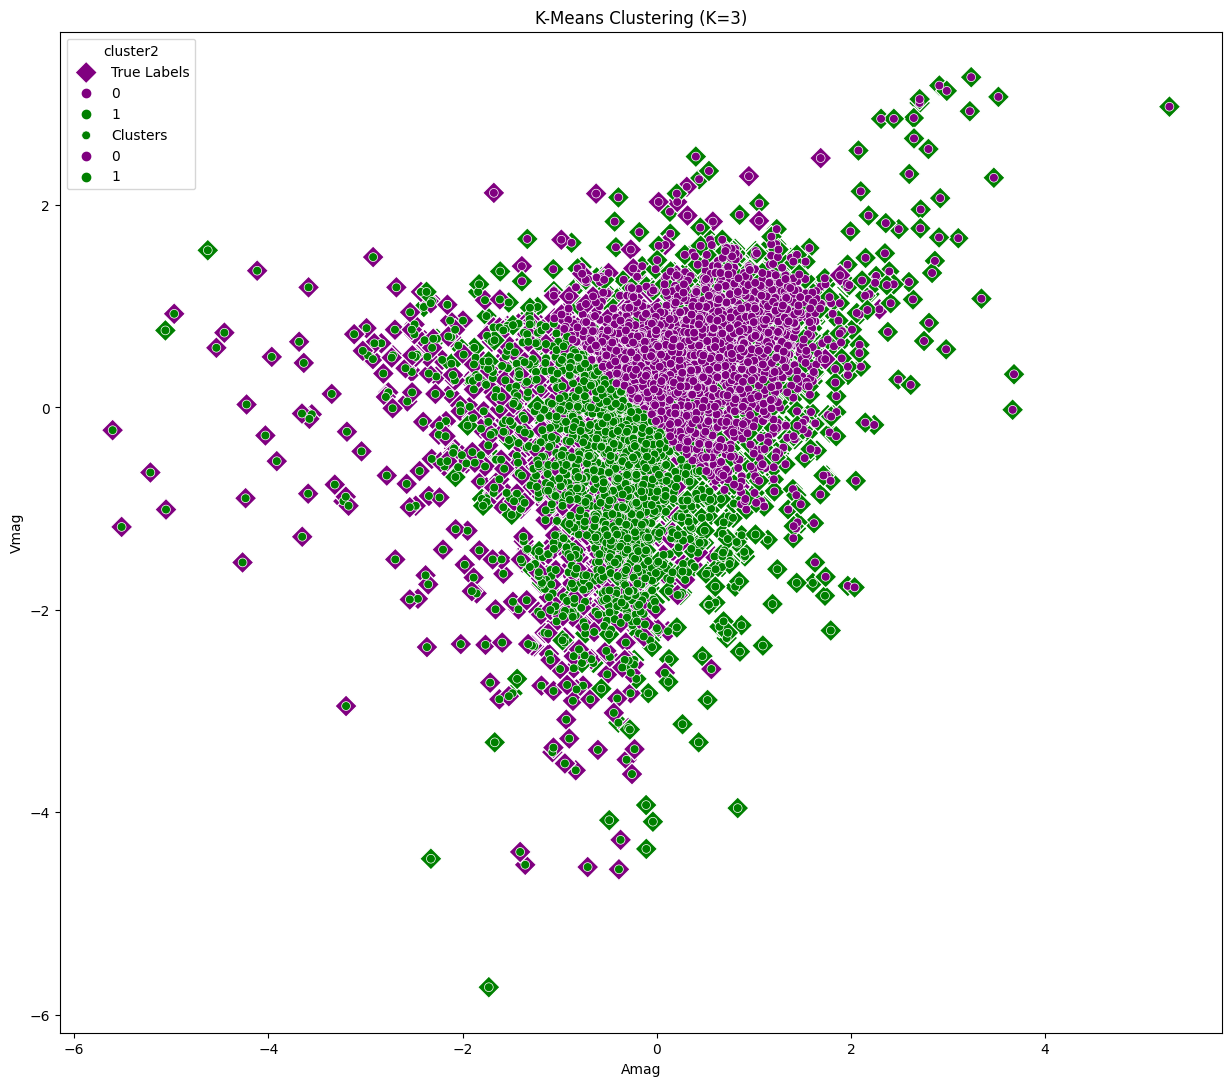

In [30]:
# Karena hasil prediksi memiliki urutan berbeda dengan label aslinya
# Maka harus dilakukan mapping seperti berikut
cluster_mapping = {0: 1, 1: 0, 2: 2} # 0 jadi 1; 1 jadi 0; 2 tetap 2
# Buat kolom baru agar tidak mengganggu kolom hasil prediksi
df["cluster2"] = df["cluster"].map(cluster_mapping)

# Buat sebuah scatter plot untuk data-points label aslinya
plt.figure(figsize=(15,13))
warna = ["purple", "green"]
sns.scatterplot(df, x="Amag", y="Vmag", palette=warna,
hue="TargetClass", marker="D", s=130, label="True Labels")

# Tindih data-points tersebut dengan hasil prediksinya
sns.scatterplot(df, x="Amag", y="Vmag", palette=warna,
hue="cluster2", marker="o", s=40, label="Clusters")

plt.title("K-Means Clustering (K=3)")
plt.xlabel("Amag")
plt.ylabel("Vmag")
plt.legend(title="Legend", loc="upper right")
plt.show()